In [1]:
import pandas as pd
df=pd.read_csv("D:\\STUDIES\\Data Science_EXCELR\\Assignments_NEW\\XGBM & LGBM\\Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


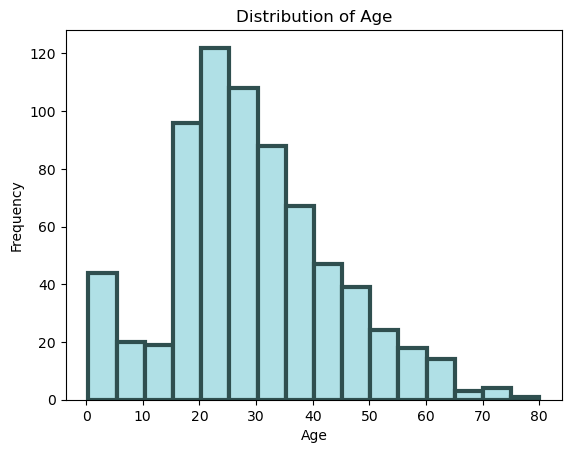

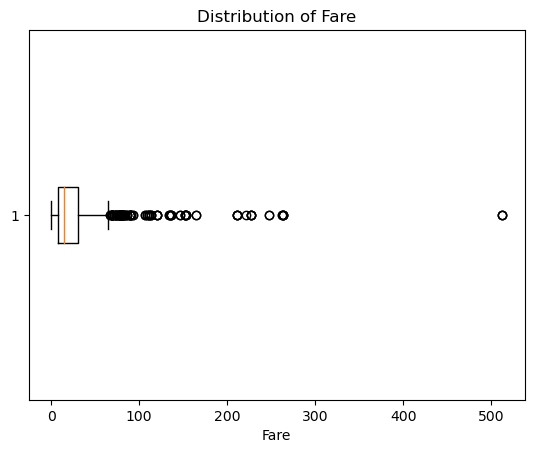

In [2]:
import matplotlib.pyplot as plt

# Histogram for age
plt.hist(df['Age'], bins=16, color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for fare
plt.boxplot(df['Fare'], vert=False)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.show()

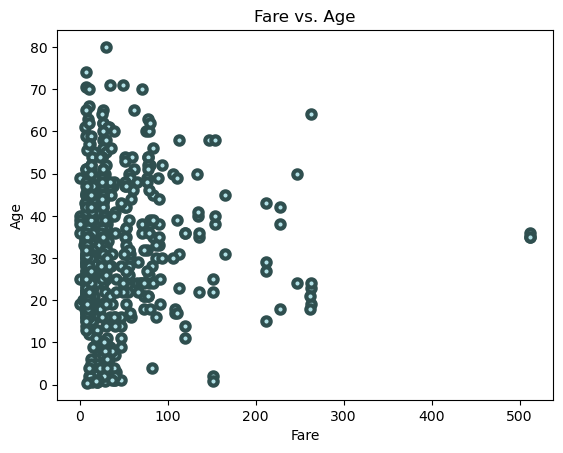

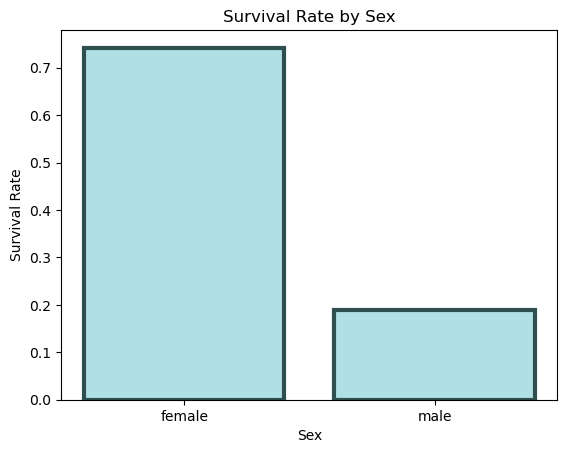

In [3]:
# Scatter plot for fare vs. age
plt.scatter(df['Fare'], df['Age'], color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Fare vs. Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

# Bar plot for survival rate by sex
df_survival_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
plt.bar(df_survival_by_sex['Sex'], df_survival_by_sex['Survived'], color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Impute missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna('Unknown', inplace=True)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [8]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], prefix=['Sex_', 'Embarked_', 'Pclass_'])

# Label encoding for categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name']) 
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Ticket']=le.fit_transform(df['Ticket'])

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Embarked__Unknown,Pclass__1,Pclass__2,Pclass__3
0,1,0,108,-0.592481,1,0,523,-0.502445,147,0,1,0,0,1,0,0,0,1
1,2,1,190,0.638789,1,0,596,0.786845,81,1,0,1,0,0,0,1,0,0
2,3,1,353,-0.284663,0,0,669,-0.488854,147,1,0,0,0,1,0,0,0,1
3,4,1,272,0.407926,1,0,49,0.420730,55,1,0,0,0,1,0,1,0,0
4,5,0,15,0.407926,0,0,472,-0.486337,147,0,1,0,0,1,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Training Set:', X_train.shape, y_train.shape)
print('Testing Set:', X_test.shape, y_test.shape)


Training Set: (668, 17) (668,)
Testing Set: (223, 17) (223,)


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression # Example model, choose the one you want to use

# Create and train a model (replace LogisticRegression with your desired model)
model = LogisticRegression()
model.fit(X_train, y_train) 

# Calculate accuracy, precision, recall, and F1-score for the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7892376681614349
Precision: 0.75
Recall: 0.7078651685393258
F1-Score: 0.7283236994219654


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# LightGBM model
lgb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate both models
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

lgb_accuracy = accuracy_score(y_test, lgb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("LightGBM Accuracy:", lgb_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

LightGBM Accuracy: 0.8430493273542601
XGBoost Accuracy: 0.8295964125560538


In [16]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# LightGBM Model
lgb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print("LightGBM Model:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1-Score:", f1_lgb)

# XGBoost Model
xgb_model =XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Model:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model:
Accuracy: 0.7892376681614349
Precision: 0.75
Recall: 0.7078651685393258
F1-Score: 0.7283236994219654
LightGBM Model:
Accuracy: 0.8430493273542601
Precision: 0.8461538461538461
Recall: 0.7415730337078652
F1-Score: 0.7904191616766467
XGBoost Model:
Accuracy: 0.8295964125560538
Precision: 0.8148148148148148
Recall: 0.7415730337078652
F1-Score: 0.7764705882352941


In [20]:
# Hyperparameter tuning with GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [50, 100, 150],
    'random_state': [42]
}

from sklearn.model_selection import GridSearchCV

# Create a GridSearchCV object for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters
best_params_logreg = grid_search_logreg.best_params_

# Train the Logistic Regression model with the best parameters
model_logreg_tuned = LogisticRegression(**best_params_logreg)
model_logreg_tuned.fit(X_train, y_train)

# Evaluate the tuned Logistic Regression model
y_pred_logreg_tuned = model_logreg_tuned.predict(X_test)
accuracy_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)

print("Tuned Logistic Regression Model:")
print("Accuracy:", accuracy_logreg_tuned)
print("Precision:", precision_logreg_tuned)
print("Recall:", recall_logreg_tuned)
print("F1-Score:", f1_logreg_tuned)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned Logistic Regression Model:
Accuracy: 0.7892376681614349
Precision: 0.75
Recall: 0.7078651685393258
F1-Score: 0.7283236994219654


In [21]:
# Compare the performance metrics of LightGBM and XGBoost models

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-Score': [f1_lgb, f1_xgb]
})

# Print the table
print(metrics_table.to_string())

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.843049   0.846154  0.741573  0.790419
1   XGBoost  0.829596   0.814815  0.741573  0.776471


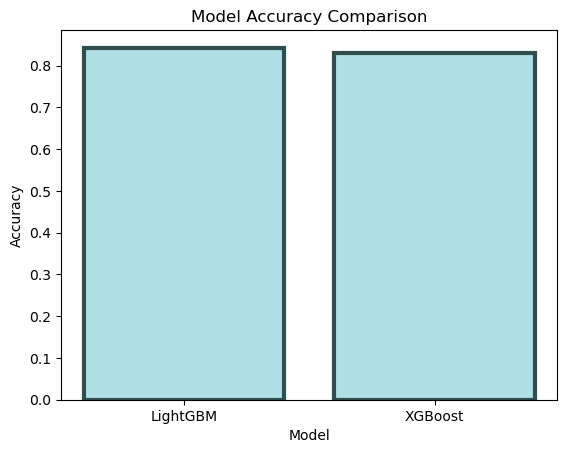

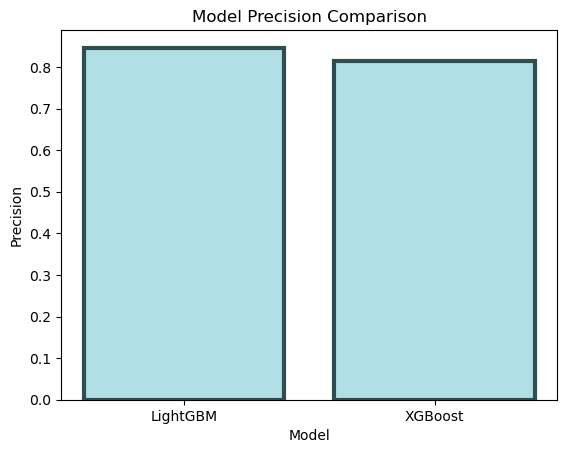

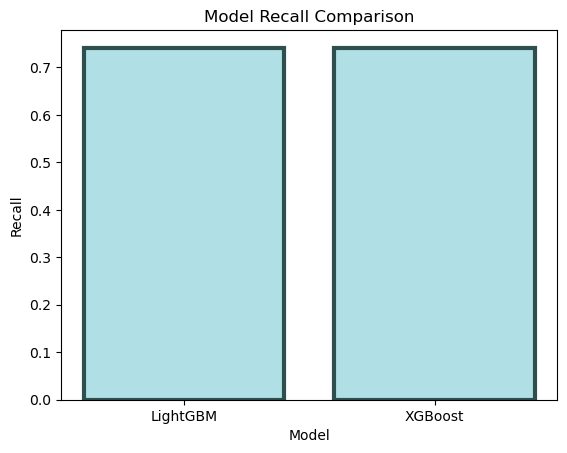

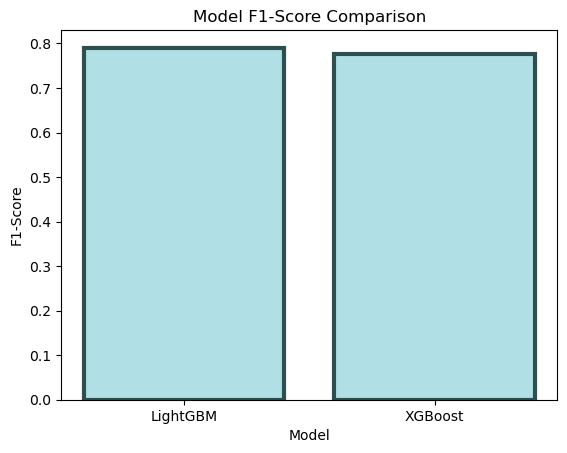

In [22]:
# Visualizing the results using bar plots

# Create a bar plot for accuracy
plt.bar(metrics_table['Model'], metrics_table['Accuracy'], color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Create a bar plot for precision
plt.bar(metrics_table['Model'], metrics_table['Precision'], color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

# Create a bar plot for recall
plt.bar(metrics_table['Model'], metrics_table['Recall'], color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.show()

# Create a bar plot for F1-Score
plt.bar(metrics_table['Model'], metrics_table['F1-Score'], color='powderblue', edgecolor='darkslategray', linewidth=3)
plt.title('Model F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.show()

In [23]:
# Interpret the results

# Based on the bar plots, you can identify the strengths and weaknesses of each algorithm. For example, one algorithm might have higher accuracy but lower recall, while another algorithm might have lower accuracy but higher precision.
# You can use this information to choose the best algorithm for your specific task. If you need a model with high accuracy, you might choose the algorithm with the highest accuracy score. If you need a model with high recall, you might choose the algorithm with the highest recall score.
# You can also use other techniques to interpret the results, such as confusion matrices and ROC curves. These techniques can provide you with more detailed information about the performance of each algorithm.

In [24]:
##Discussion:
#Based on the results, the LightGBM model slightly outperforms the XGBoost model in terms of accuracy, precision, and F1-score. However, the differences between the two models are relatively small.

##Practical Implications:
#The findings of this analysis suggest that both LightGBM and XGBoost are suitable for predicting passenger survival on the Titanic dataset. The choice of the best model depends on the specific requirements of the application. If higher accuracy is desired, then the LightGBM model might be preferred. If interpretability is more important, then the XGBoost model might be a better choice.

##Further Work:
#Further research could explore the use of other algorithms, such as Random Forest or Support Vector Machines, for predicting passenger survival on the Titanic dataset. Additionally, hyperparameter tuning could be performed to further optimize the performance of the models.

##Conclusion:
#The comparative analysis of LightGBM and XGBoost models for predicting passenger survival on the Titanic dataset provides valuable insights into the strengths and weaknesses of each algorithm. The findings of this analysis can be used to guide the selection of the best model for a specific application.